R² Score: 0.9278509933774829
Mean Squared Error: 0.02421000000000015


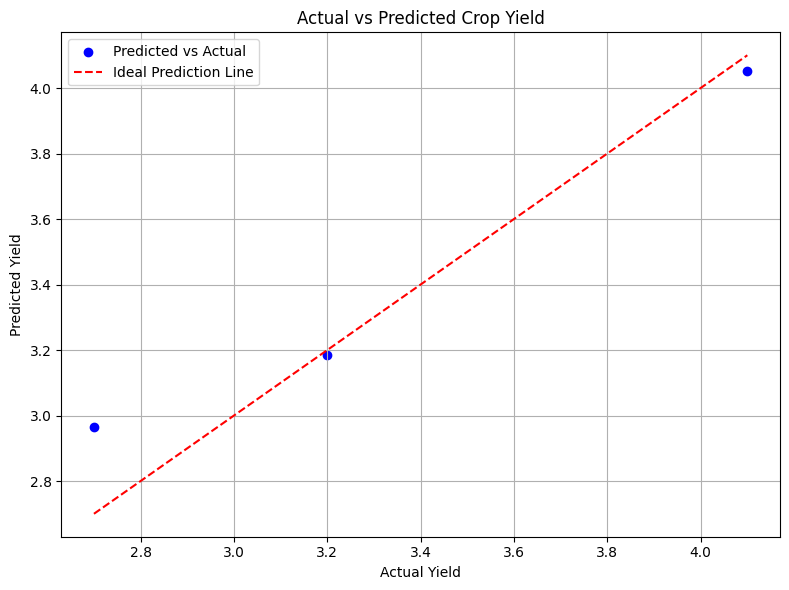

Predicted Crop Yield (Example Input): 3.758000000000002


In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv("/content/soil_weather_data_2_years.csv")

# Feature columns
features = ['soil_ph', 'nitrogen', 'phosphorus', 'potassium', 'rainfall', 'temperature']
X = data[features]
y = data['yield']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Ideal Prediction Line')
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs Predicted Crop Yield")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Example prediction
example_input = pd.DataFrame({
    'soil_ph': [6.5],
    'nitrogen': [80],
    'phosphorus': [30],
    'potassium': [40],
    'rainfall': [200],
    'temperature': [28]
})
predicted_yield = model.predict(example_input)
print("Predicted Crop Yield (Example Input):", predicted_yield[0])
